In [1]:
from pymatgen import *
from pymatgen.io.cif import *
from math import * 
from pymatgen.ext.matproj import *
a = MPRester("T3RWfjVR1dBMcIZ5TCyX")
import numpy as np
from math import *
import pandas as df
from pandas import *
import seaborn as sns, matplotlib.pyplot as plt, operator as op
import matplotlib.pyplot as plt1
% matplotlib inline

/usr/local/lib/python2.7/site-packages/pymatgen/__init__.py:89: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")
/usr/local/lib/python2.7/site-packages/pymatgen/io/cif.py:44: UserWarning: Please install optional dependency pybtex if youwant to extract references from CIF files.
  warnings.warn("Please install optional dependency pybtex if you"
/usr/local/lib/python2.7/site-packages/pymatgen/ext/matproj.py:110: UserWarning: If you query for structure data encoded using MP's Structure Notation Language (SNL) format and you use `mp_decode=True` (the default) for MPRester queries, you should install dependencies via `pip install pymatgen[matproj.snl]`.
  warnings.warn("If you query for structure data encoded using MP's "


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


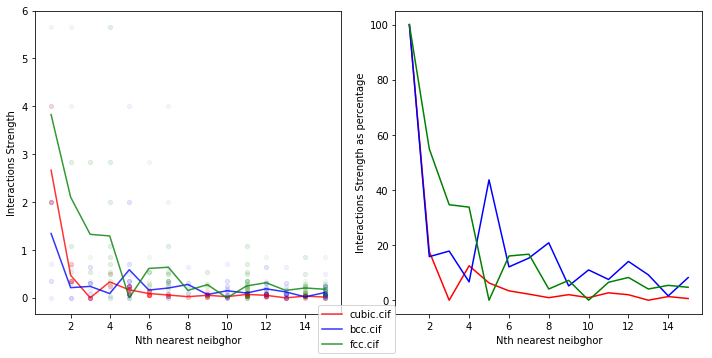

In [5]:
def calculateinter(filename):
    no_nb=15
    global ncolor
    struc = Structure.from_file(filename)
    values=[]
    up=[0,0,1]
    d=[0,0,-1]
    scale=5
    dist=[]
    for i in struc.get_neighbors(struc[0],19):
        dist.append(i[1])
        pos= i[0].coords/scale
        Vuu=(np.dot(up,up)-(3*np.dot(up,pos)*np.dot(up,pos))/pow(np.linalg.norm(pos),2))/pow(np.linalg.norm(pos),3)
        Vud=(np.dot(up,d)-(3*np.dot(d,pos)*np.dot(up,pos))/pow(np.linalg.norm(pos),2))/pow(np.linalg.norm(pos),3)
        #print round(i[1],2),round(Vuu-Vud,4),pos
        pair=[i[1]/scale,Vuu-Vud]
        values.append(pair)
    df = DataFrame(values)
    df.columns = ['dist', 'inter']
    df.head()
    df=df.sort_values("dist")
    #for i in zip(df.sort_values("dist")["dist"].values,df.sort_values("dist")["inter"].values):
    #plt.scatter(df.sort_values("dist")["dist"].values,np.absolute(df.sort_values("dist")["inter"].values))
    g = df.groupby(df["dist"])
    g.get_group(df["dist"].unique()[3])
    means=[]
    #plt.figure(1)
    plt.subplot(121)
    for i in range(0,no_nb):
        y=np.absolute(g.get_group(df["dist"].unique()[i]).inter)
        x=np.repeat(i+1, len(y))
        plt.scatter(x,y,alpha=.05,s=18,c=colors[ncolor],label=None)
        means.append(np.mean(y))

    
    plt.plot(range(1,len(means)+1),means,c=colors[ncolor],label=filename,alpha=.8)
    plt.ylabel('Interactions Strength')
    plt.xlabel('Nth nearest neibghor')
    plt.subplot(122)
    percent=100*np.array(means/means[0])
    
    plt.plot(range(1,len(percent)+1),percent,c=colors[ncolor])
    plt.ylabel('Interactions Strength as percentage')
    plt.xlabel('Nth nearest neibghor')
    ncolor+=1
    
    #plt.savefig("interaction.png",dpi=1000)
    #plt.show()
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,5))
colors = ["red", "blue" , "green", "orange", "purple"] 
ncolor=0
filenames=["cubic.cif","bcc.cif","fcc.cif"]
for i in filenames:
    calculateinter(i)
plt.figlegend(loc='lower center')
plt.tight_layout()
fig.savefig("Nearest_neibghor.png")
plt.show()
